# Did my singles grid code work

In [1]:
import os

import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.gridspec import GridSpec

from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

import astropy.constants as const
import astropy.units as u

from astropy.visualization import quantity_support
quantity_support()

from ipywidgets import interact, IntSlider, FloatSlider

import seaborn as sns

In [2]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': 0.6*fs,
          'axes.labelsize': 0.8*fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

# Load and prep data

In [49]:
from importlib import reload
import sys
sys.path.append("../")

import mesagrid
reload(mesagrid);

sys.path.append("../helpers")
import mesaplot_tom as mpt
reload(mpt);

In [36]:
usecols_history = ['model_number', 'star_age', 'log_Teff', 'log_L',
                   'center_h1', 'center_he4', 'star_mass']
cpus = 8

Ms = np.arange(3.0, 6.0 + 0.1, 0.1).round(1)
tracks = [mesagrid.Track(f"../output/cluster/singles_grid/M_{M}/",
                       usecols_history=usecols_history,
                       cpus=cpus, parameters=f"M={M}") for M in Ms]

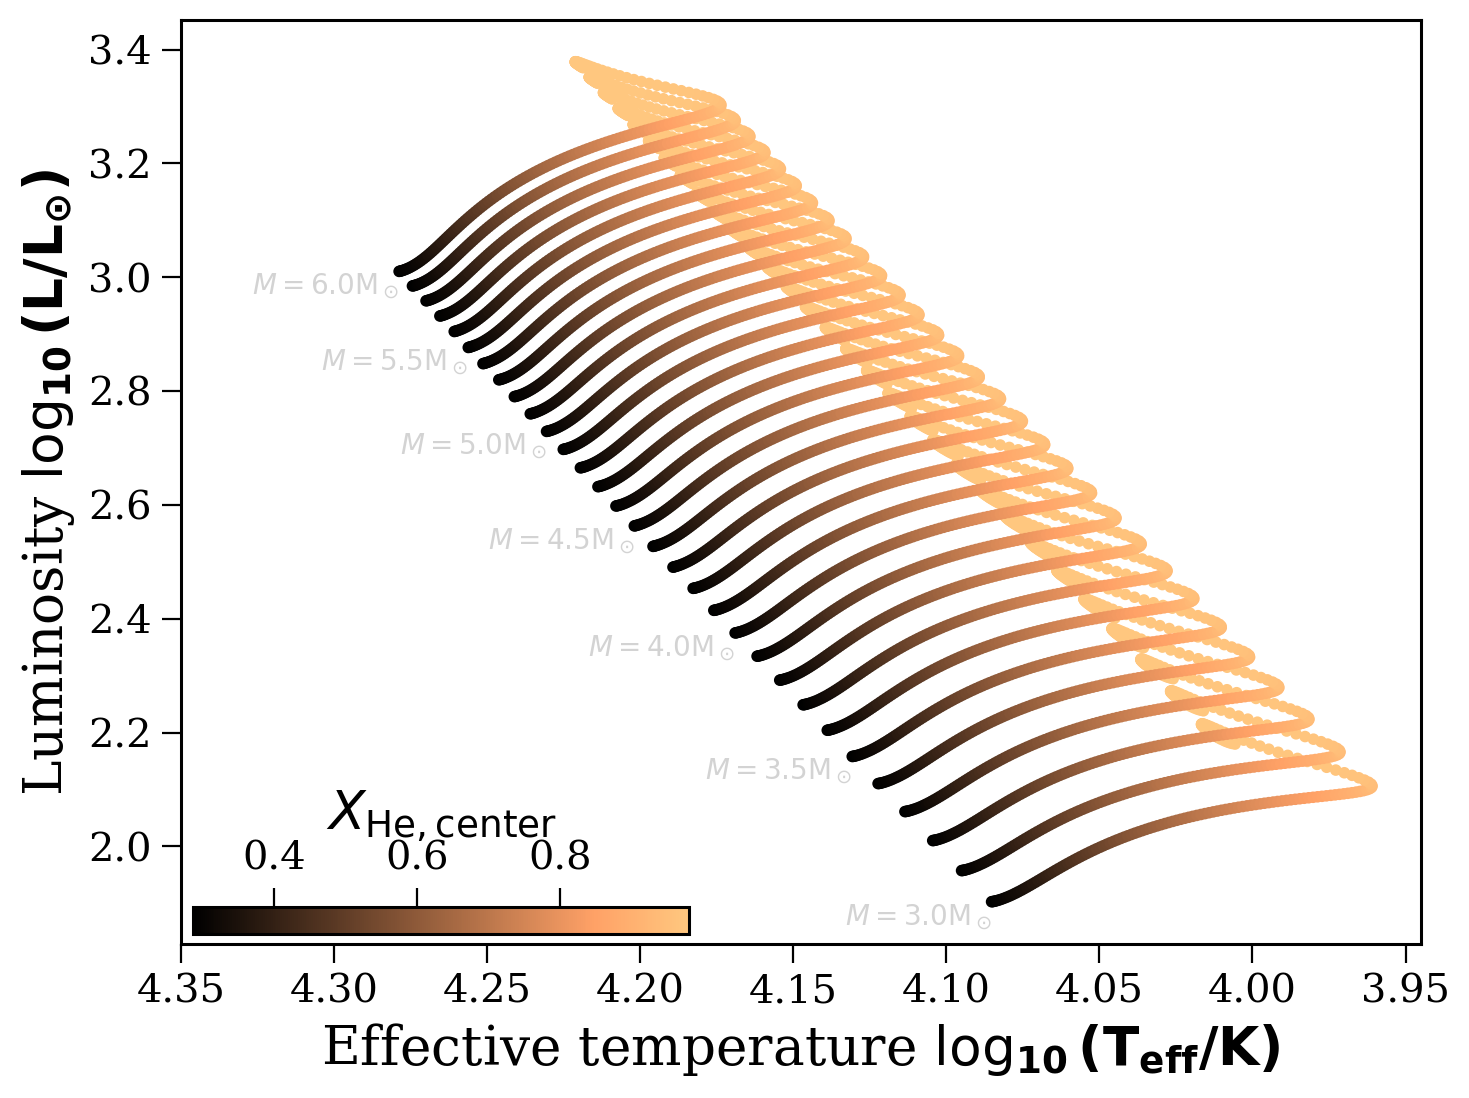

In [50]:
fig, ax = None, None
for i in range(len(tracks)):
    ans = fr"$M = {{{Ms[i]}}} {{\rm M_\odot}}$" if i in np.arange(0, len(tracks) + 5, 5) else None
    fig, ax = mpt.simple_hr(tracks[i], fig=fig, ax=ax, show=False, cbar_loc=[0.01, 0.01, 0.4, 0.03],
                            annotate_start=ans)
ax.set_xlim(left=4.35)
plt.show()